# Restore an image

In [1]:
# Import numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Function for image comparison
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,8), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original image', fontsize=10)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered, fontsize=10)
    ax2.axis('off')

In [4]:
# Import image from data folder
old_image = plt.imread('../../Photos/old_image.png')

## Image reconstruction
* fixing damaged images
* text removing
* logo removing
* object removing

### Inpainting
* reconstructing lost parts of images
* looking at the  non-damaged regions

damaged pixels are set as a mask

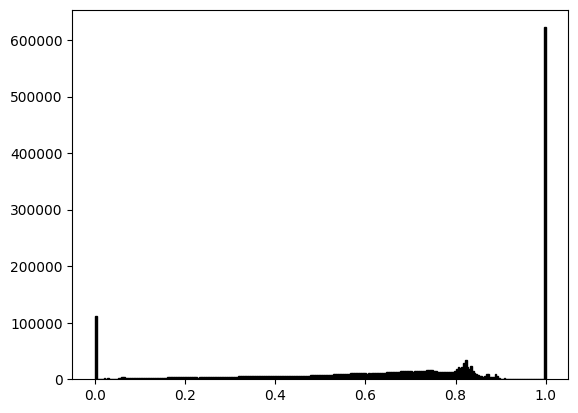

In [8]:
# histogram
plt.hist(old_image.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

In [31]:
# convert to greyscale
old_image_grey = old_image.mean(axis=2)

In [33]:
old_image_grey.shape

(795, 783)

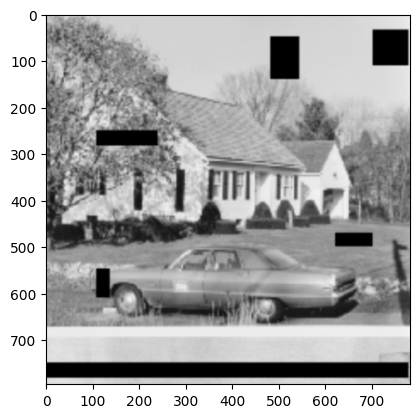

In [41]:
# display old_image_grey
plt.imshow(old_image_grey, cmap=plt.cm.gray)
plt.show()

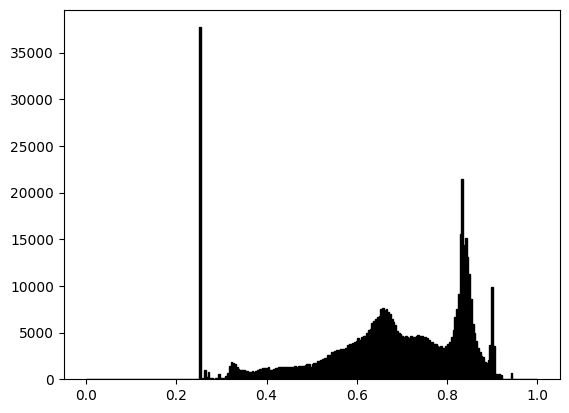

In [43]:
plt.hist(old_image_grey.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

In [61]:
# if pixel value is equal to 1 set to true else false
mask = old_image_grey < 0.3
mask

# make array to binary
mask = mask.astype(int)
mask


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
# count 1's in mask
np.count_nonzero(mask)

41097

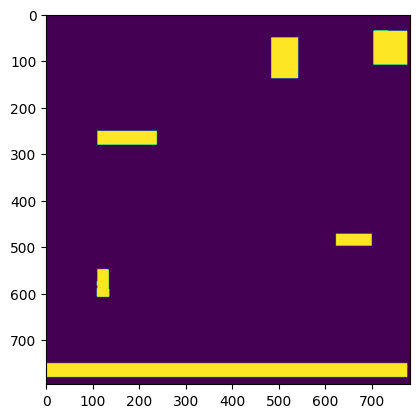

In [63]:
plt.imshow(mask)
plt.show()

In [58]:
# invert binary
mask = 1 - mask

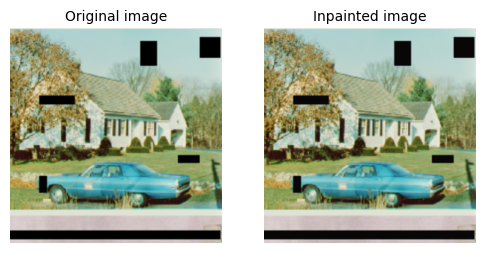

In [64]:
from skimage.restoration import inpaint

# Create a mask for the damaged area, boolean array
#mask = np.zeros(old_image.shape[:2], dtype=np.bool)
#mask = np.zeros(old_image.shape[:2], dtype=np.uint8)


# Apply inpainting to the damaged image using the mask
inpaint_image = inpaint.inpaint_biharmonic(old_image, mask, channel_axis=2)

# Show the original and the inpainted image
plot_comparison(old_image, inpaint_image, 'Inpainted image')

## Masks

In [ ]:
def get_mask(image):
    ''' Creates a mask for the damaged area, boolean array '''
    mask = np.zeros(image.shape[:1])#, dtype=np.bool
    mask[0:10, 0:10] = 1
    return mask